<a href="https://colab.research.google.com/github/JudithGH/CursodeLenguajesDeProgramaci-n/blob/main/PROYECTO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Lectura el archivo Excel con precios de cierre mensuales***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("/BD2025_01.xlsx", engine="openpyxl")

df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,PFBCOLO,BCOLO,ECOPETL,ISA,GEB,CEMARGOS,GRUPOARG,PFGRUPSU,PFGRUPOA,...,CORFICOL,GRUPOBOL,PROMIG,BOGOTA,MINEROS,TERPEL,PFCORCOL,CNEC,ETB,COLCAP
0,2010-01-29,21760,22200,2455,12680,1198.0,6495.366,19980,NaN,NaN,...,10950.195,40000,4292.245,31473.509,5500,NaN,11264.812,NaN,1140.0,1363.67
1,2010-02-26,22220,22300,2560,12880,1234.0,6506.432,19300,NaN,NaN,...,12686.790,40000,4172.684,34898.567,5550,NaN,12330.403,NaN,1005.0,1391.02
2,2010-03-31,22280,22280,2700,12800,1250.0,6628.151,19800,NaN,NaN,...,13800.060,42500,4182.249,34528.290,5720,NaN,13540.856,NaN,1040.0,1440.58
3,2010-04-30,23000,23020,2765,12980,1290.0,6373.647,19400,NaN,NaN,...,14906.857,40600,4208.552,36842.519,5720,NaN,14579.233,NaN,1155.0,1467.26
4,2010-05-31,23500,23500,2700,12720,1275.4,6218.732,19200,NaN,NaN,...,14468.126,41420,4184.640,35916.827,5700,NaN,14159.686,NaN,1075.0,1444.54


***Procesar la columna de fechas y ordenar correctamente los datos***

In [ ]:
df = df.sort_values('Date')
print(df)

          Date  PFBCOLO   BCOLO   ECOPETL    ISA     GEB   CEMARGOS   \
0   2010-01-29     21760   22200      2455  12680  1198.0   6495.366   
1   2010-02-26     22220   22300      2560  12880  1234.0   6506.432   
2   2010-03-31     22280   22280      2700  12800  1250.0   6628.151   
3   2010-04-30     23000   23020      2765  12980  1290.0   6373.647   
4   2010-05-31     23500   23500      2700  12720  1275.4   6218.732   
..         ...       ...     ...       ...    ...     ...        ...   
177 2024-10-31     35420   37800      1700  17580  2530.0   8590.000   
178 2024-11-29     35980   38580      1800  16800  2580.0   9620.000   
179 2024-12-31     35180   37600      1675  16700  2440.0  10200.000   
180 2025-01-31     41400   43100      1960  18480  2700.0  10340.000   
181 2025-02-28     42900   45700      2060  20720  2875.0  10000.000   

     GRUPOARG   PFGRUPSU   PFGRUPOA   ...  CORFICOL   GRUPOBOL    PROMIG   \
0        19980        NaN        NaN  ...  10950.195      

***Crear una nueva tabla que contenga las rentabilidades mensuales de todas las acciones***

In [3]:
rentabilidad = pd.DataFrame()
rentabilidad["Date"] = df['Date']

acciones = df.columns.drop("Date")

***Calcular la rentabilidad mensual usando***

In [ ]:
for accion in acciones:
    rendimientos = [None]

    for i in range(1, len(df)):
        precio_actual = df[accion].iloc[i]
        precio_anterior = df[accion].iloc[i - 1]

        if pd.notna(precio_actual) and pd.notna(precio_anterior) and precio_anterior != 0:
            rendimiento = (precio_actual - precio_anterior) / precio_anterior
        else:
            rendimiento = None

        rendimientos.append(rendimiento)

    rentabilidad[accion] = rendimientos

print("------------------------------PUNTO 2 ----------------------------------------")
rentabilidad.to_excel("rentabilidad_dec.xlsx", index=False)
print(rentabilidad)

------------------------------PUNTO 2 ----------------------------------------
          Date  PFBCOLO     BCOLO   ECOPETL       ISA       GEB   CEMARGOS   \
0   2010-01-29       NaN       NaN       NaN       NaN       NaN        NaN   
1   2010-02-26  0.021140  0.004505  0.042770  0.015773  0.030050   0.001704   
2   2010-03-31  0.002700 -0.000897  0.054688 -0.006211  0.012966   0.018707   
3   2010-04-30  0.032316  0.033214  0.024074  0.014063  0.032000  -0.038397   
4   2010-05-31  0.021739  0.020851 -0.023508 -0.020031 -0.011318  -0.024306   
..         ...       ...       ...       ...       ...       ...        ...   
177 2024-10-31  0.067511  0.043046 -0.095745  0.029274  0.020161   0.145333   
178 2024-11-29  0.015810  0.020635  0.058824 -0.044369  0.019763   0.119907   
179 2024-12-31 -0.022235 -0.025402 -0.069444 -0.005952 -0.054264   0.060291   
180 2025-01-31  0.176805  0.146277  0.170149  0.106587  0.106557   0.013725   
181 2025-02-28  0.036232  0.060325  0.051020  0.1212

***Gráfico de caja – Distribución de rentabilidades mensuales por acción***

<ipython-input-17-531add412603>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([rentabilidad_box[col].dropna() for col in rentabilidad_box.columns], labels=rentabilidad_box.columns)


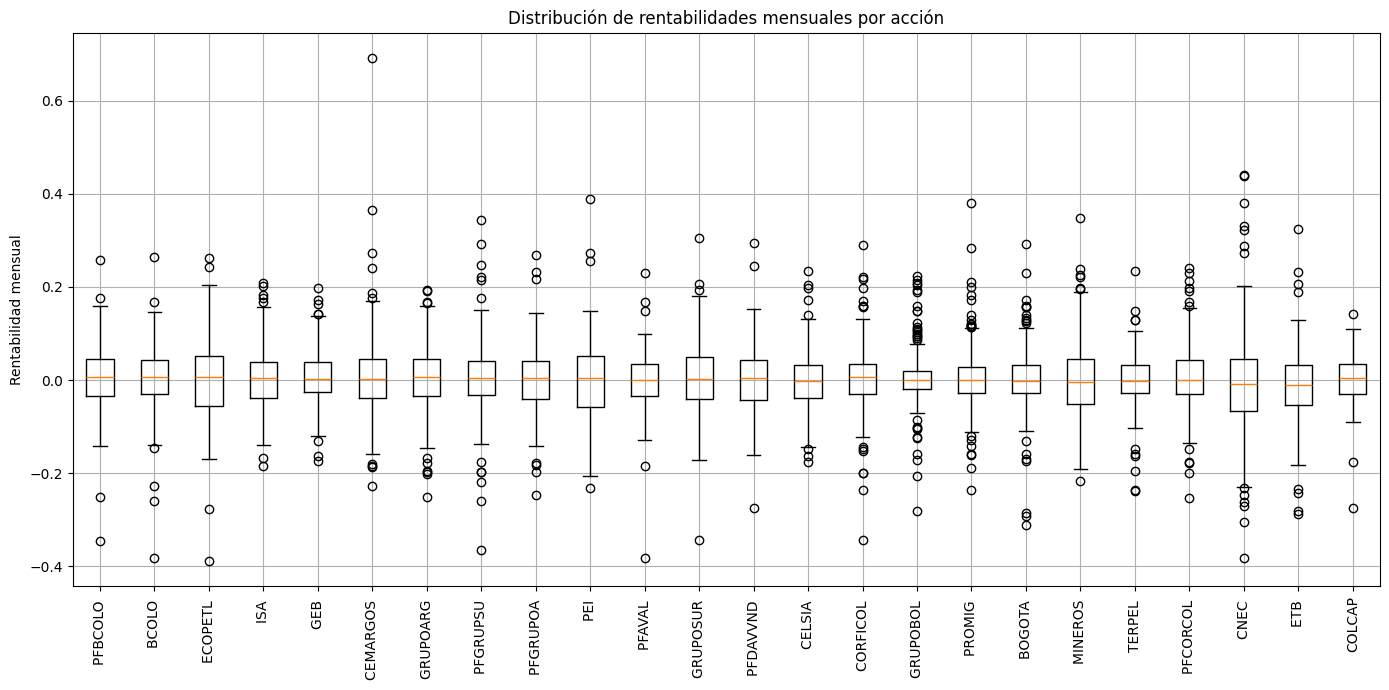

In [ ]:
plt.figure(figsize=(14, 7))
rentabilidad_box = rentabilidad.drop(columns="Date")
plt.boxplot([rentabilidad_box[col].dropna() for col in rentabilidad_box.columns], labels=rentabilidad_box.columns)
plt.title("Distribución de rentabilidades mensuales por acción")
plt.ylabel("Rentabilidad mensual")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

***Combinar todas las rentabilidades en una sola serie***

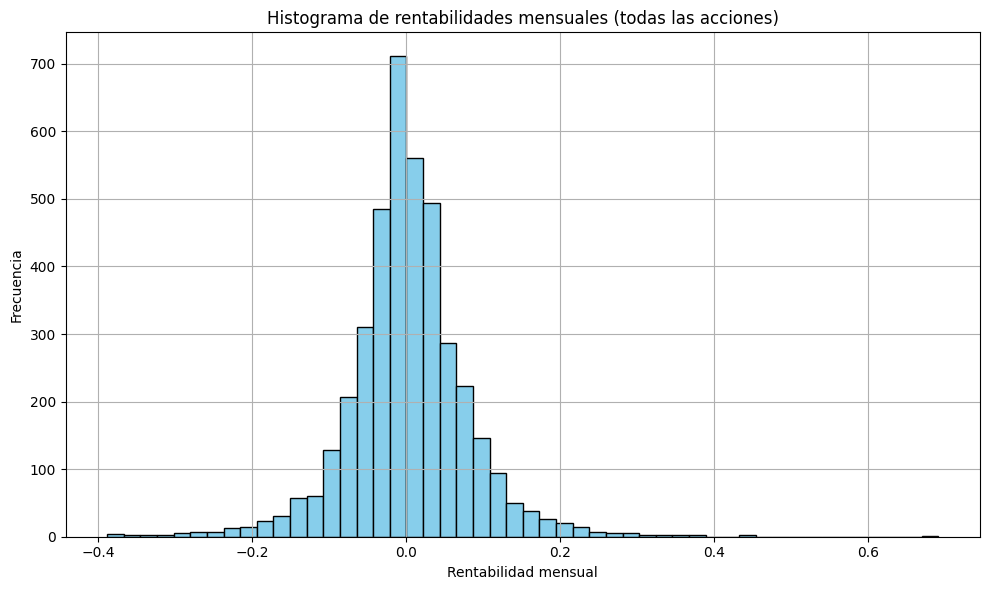

In [ ]:
todas_rentabilidades = rentabilidad.drop(columns="Date").values.flatten()
todas_rentabilidades = todas_rentabilidades[~pd.isna(todas_rentabilidades)]  # eliminar NaN

plt.figure(figsize=(10, 6))
plt.hist(todas_rentabilidades, bins=50, color='skyblue', edgecolor='black')
plt.title("Histograma de rentabilidades mensuales (todas las acciones)")
plt.xlabel("Rentabilidad mensual")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def guardar_rentabilidad_en_porcentaje(df_rentabilidad, nombre_archivo="rentabilidad_porcentaje.xlsx"):
    df_porcentaje = df_rentabilidad.copy()

    for columna in df_porcentaje.columns:
        if columna != "Date":
            df_porcentaje[columna] = df_porcentaje[columna] * 100
            df_porcentaje[columna] = df_porcentaje[columna].map(lambda x: f"{x:.2f}%" if pd.notna(x) else None)

    df_porcentaje.to_excel(nombre_archivo, index=False)
    return f"Archivo guardado como '{nombre_archivo}'"

print("")
print("")
print("------------------------------------------------PUNTO 2.1 rentabilidad porcentaje-------------------------------------------------------")
prueba = guardar_rentabilidad_en_porcentaje(rentabilidad)
print(prueba)




------------------------------------------------PUNTO 2.1 rentabilidad porcentaje-------------------------------------------------------
Archivo guardado como 'rentabilidad_porcentaje.xlsx'


***Calcular la rentabilidad promedio mensual entre enero de 2010 y febrero de 2025***

In [ ]:
inicio = pd.to_datetime("2010-01-29")
fin = pd.to_datetime("2025-02-28")
rentabilidad_filtrada = rentabilidad[(rentabilidad["Date"] >= inicio) & (rentabilidad["Date"] <= fin)]

promedio_mensual = {}

for accion in acciones:
    promedio = rentabilidad_filtrada[accion].mean(skipna=True)
    promedio_mensual[accion] = promedio

df_promedios = pd.DataFrame(list(promedio_mensual.items()), columns=["Accion", "Rentabilidad Promedio Mensual"])
df_promedios["Rentabilidad Promedio Mensual (%)"] = df_promedios["Rentabilidad Promedio Mensual"] * 100


print("")
print("--------------------------------------PUNTO 3-----------------------------------")
df_promedios.to_excel("promedio_mensual.xlsx", index=False)
print(df_promedios)



--------------------------------------PUNTO 3-----------------------------------
       Accion  Rentabilidad Promedio Mensual  \
0    PFBCOLO                        0.006246   
1      BCOLO                        0.006887   
2    ECOPETL                        0.003126   
3        ISA                        0.005021   
4        GEB                        0.006498   
5   CEMARGOS                        0.006521   
6   GRUPOARG                        0.002916   
7   PFGRUPSU                        0.005072   
8   PFGRUPOA                        0.002837   
9        PEI                        0.017076   
10    PFAVAL                       -0.001548   
11  GRUPOSUR                        0.005971   
12  PFDAVVND                        0.002047   
13    CELSIA                        0.000186   
14  CORFICOL                        0.005735   
15  GRUPOBOL                        0.005348   
16    PROMIG                        0.005049   
17    BOGOTA                        0.002558   
18   M

***Calcular la rentabilidad mínima y rentabilidad máxima observadas en cualquier mes***

In [ ]:
rentabilidad_minima = None
rentabilidad_maxima = None

for i in range(len(rentabilidad)):
    for accion in acciones:
        valor = rentabilidad[accion].iloc[i]

        if pd.notna(valor):
            if rentabilidad_minima is None or valor < rentabilidad_minima:
                rentabilidad_minima = valor

            if rentabilidad_maxima is None or valor > rentabilidad_maxima:
                rentabilidad_maxima = valor

print("-------------------------------------------- Punto 3.1 -----------------------------------------")
print("Rentabilidad mínima observada:", rentabilidad_minima, f"({rentabilidad_minima * 100:.2f}%)")
print("Rentabilidad máxima observada:", rentabilidad_maxima, f"({rentabilidad_maxima * 100:.2f}%)")


# Calcular la rentabilidad acumulada total entre enero de 2010 y febrero de
# 2025:
print("----------------------------------- punto 3.2 ----------------------------------------------------")
print("Rentabilidad acumulada total entre enero de 2010 y febrero de 2025:")

for accion in acciones:
    precio_inicial = df[accion].iloc[0]
    precio_final = df[accion].iloc[-1]

    if pd.notna(precio_inicial) and pd.notna(precio_final) and precio_inicial != 0:
        rentabilidad_acumulada = (precio_final / precio_inicial - 1) * 100
        print(f"{accion}: {rentabilidad_acumulada:.2f}%")
    else:
        print(f"{accion}: No disponible (datos faltantes)")


-------------------------------------------- Punto 3.1 -----------------------------------------
Rentabilidad mínima observada: -0.38808373590982287 (-38.81%)
Rentabilidad máxima observada: 0.6919365954514128 (69.19%)
----------------------------------- punto 3.2 ----------------------------------------------------
Rentabilidad acumulada total entre enero de 2010 y febrero de 2025:
PFBCOLO : 97.15%
BCOLO : 105.86%
ECOPETL : -16.09%
ISA : 63.41%
GEB : 139.98%
CEMARGOS : 53.96%
GRUPOARG : 1.10%
PFGRUPSU : No disponible (datos faltantes)
PFGRUPOA : No disponible (datos faltantes)
PEI : No disponible (datos faltantes)
PFAVAL : No disponible (datos faltantes)
GRUPOSUR : 68.38%
PFDAVVND : No disponible (datos faltantes)
CELSIA : -28.06%
CORFICOL : 66.21%
GRUPOBOL : 77.85%
PROMIG : 56.10%
BOGOTA : -6.59%
MINEROS : -2.73%
TERPEL : No disponible (datos faltantes)
PFCORCOL : 50.91%
CNEC : No disponible (datos faltantes)
ETB : -94.82%
COLCAP: 17.89%


visualizaciones-----------------------------------------------------------------------------------


#  Gráfico de líneas – Evolución de rentabilidad mensual de 3 acciones


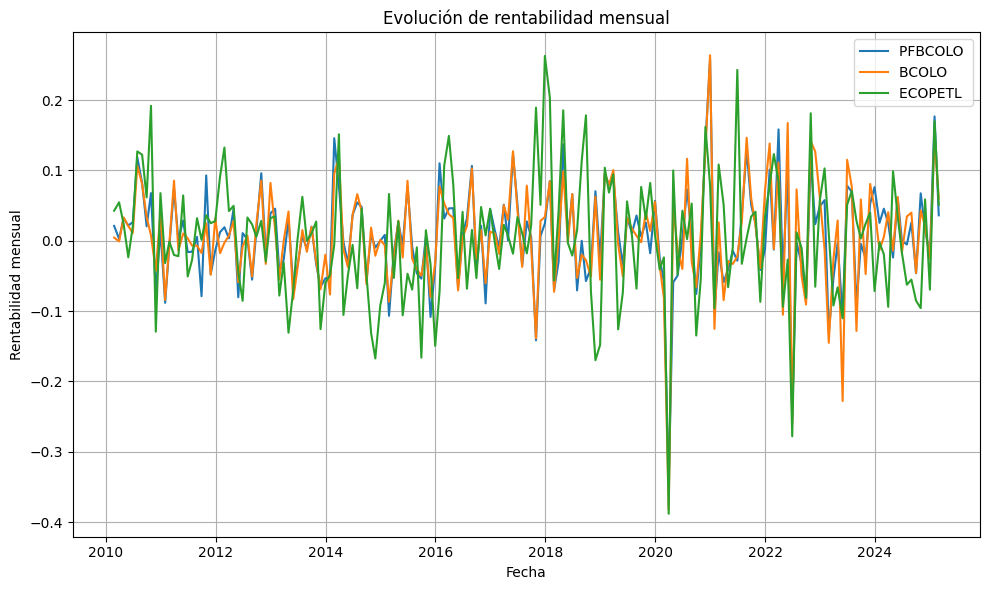

In [ ]:
acciones_seleccionadas = acciones[:3]

plt.figure(figsize=(10, 6))
for accion in acciones_seleccionadas:
    plt.plot(rentabilidad["Date"], rentabilidad[accion], label=accion)

plt.title("Evolución de rentabilidad mensual")
plt.xlabel("Fecha")
plt.ylabel("Rentabilidad mensual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Gráfico de barras – Comparación de rentabilidad acumulada total


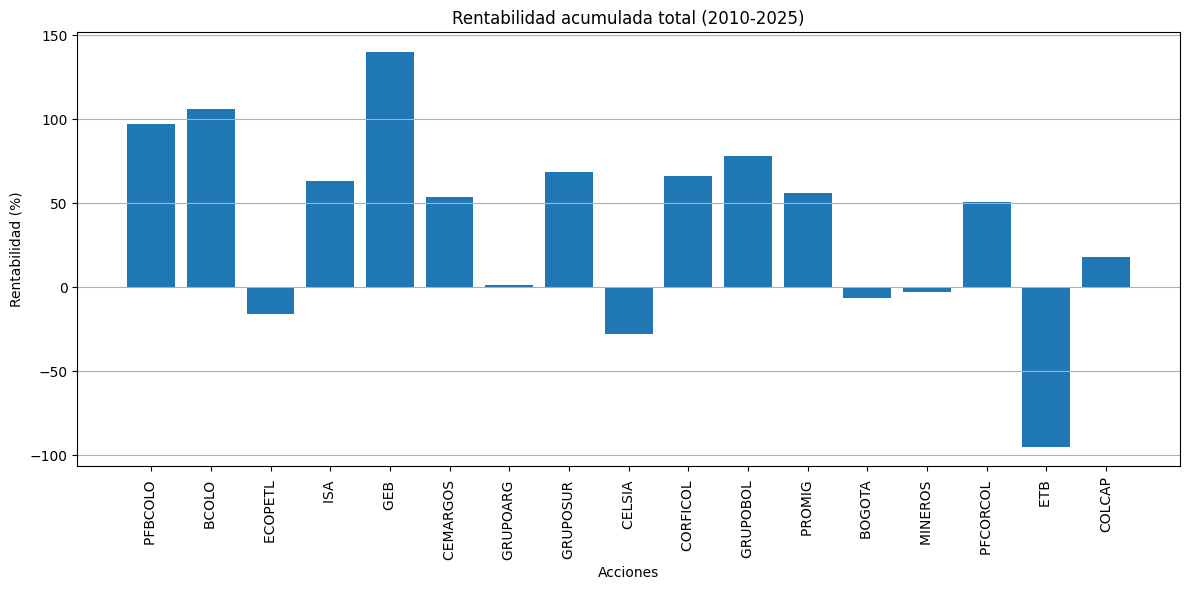

In [ ]:
rentabilidades_acumuladas = {}

for accion in acciones:
    precio_inicial = df[accion].iloc[0]
    precio_final = df[accion].iloc[-1]
    if pd.notna(precio_inicial) and pd.notna(precio_final) and precio_inicial != 0:
        rentabilidad = (precio_final / precio_inicial - 1) * 100
        rentabilidades_acumuladas[accion] = rentabilidad

plt.figure(figsize=(12, 6))
plt.bar(rentabilidades_acumuladas.keys(), rentabilidades_acumuladas.values())
plt.title("Rentabilidad acumulada total (2010-2025)")
plt.xlabel("Acciones")
plt.ylabel("Rentabilidad (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis="y")
plt.show()
